#Imports

In [ ]:
import sys
!{sys.executable} -m pip install -U ydata-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
!pip install lazypredict

In [ ]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score
import ydata_profiling as ydata
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import config_context
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import recall_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifierCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from lazypredict.Supervised import LazyClassifier

#Loading data

In [ ]:
#data https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [ ]:
path_data = "/content/healthcare-dataset-stroke-data.csv"

raw_df = pd.read_csv(path_data)

In [ ]:
raw_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
raw_df.shape

(5110, 12)

the dataset has 5110 samples, 10 features, and labels are related to stroke (0 - no, 1 - yes)

there are numerical and object data types (gender, ever-married, work-type, residence-type '''


In [ ]:
raw_df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.00,5110,5110.00,5110.00,5110.00,5110,5110,5110,5110.00,4909.00,5110,5110.00
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.83,NaN,43.23,0.10,0.05,NaN,NaN,NaN,106.15,28.89,NaN,0.05
std,21161.72,NaN,22.61,0.30,0.23,NaN,NaN,NaN,45.28,7.85,NaN,0.22
min,67.00,NaN,0.08,0.00,0.00,NaN,NaN,NaN,55.12,10.30,NaN,0.00
25%,17741.25,NaN,25.00,0.00,0.00,NaN,NaN,NaN,77.25,23.50,NaN,0.00
50%,36932.00,NaN,45.00,0.00,0.00,NaN,NaN,NaN,91.88,28.10,NaN,0.00
75%,54682.00,NaN,61.00,0.00,0.00,NaN,NaN,NaN,114.09,33.10,NaN,0.00


#Y_data profile

In [ ]:
ydata_profile = ydata.ProfileReport(raw_df, title="Strokes predictions dataset Report")
ydata_profile.to_file("strokes_predictions_dataset.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#Addressing missing values

#Missing numerical values

In [ ]:
missing_values_sum = raw_df.isna().sum()
missing_values_percentage = (missing_values_sum / len(raw_df)) * 100

# Creating a DataFrame for missing values statistics
missing_values_statistics = pd.DataFrame({
    'missing_values_sum': missing_values_sum,
    'missing_values_percentage': missing_values_percentage
})

print(missing_values_statistics)

                   missing_values_sum  missing_values_percentage
id                                  0                       0.00
gender                              0                       0.00
age                                 0                       0.00
hypertension                        0                       0.00
heart_disease                       0                       0.00
ever_married                        0                       0.00
work_type                           0                       0.00
Residence_type                      0                       0.00
avg_glucose_level                   0                       0.00
bmi                               201                       3.93
smoking_status                      0                       0.00
stroke                              0                       0.00


''' bmi contains only 4% unknown values. Yet, replacing it with mean or median would bias it too much in my opinion. I think that 4% rows can be dropped.'''

In [ ]:
# filtering out the samples with unknown bmi

# Filtering out rows where 'bmi' is missing (NaN)
filtered_df = raw_df.dropna(subset=['bmi'])

filtered_df.shape

(4909, 12)

In [ ]:
# checking I have no missing numerical values in the dataset
missing_values_sum = filtered_df.isnull().sum()
missing_values_percentage = (missing_values_sum / len(filtered_df)) * 100

# Creating a DataFrame for missing values statistics
missing_values_statistics = pd.DataFrame({
    'missing_values_sum': missing_values_sum,
    'missing_values_percentage': missing_values_percentage
})

print(missing_values_statistics)

                   missing_values_sum  missing_values_percentage
id                                  0                       0.00
gender                              0                       0.00
age                                 0                       0.00
hypertension                        0                       0.00
heart_disease                       0                       0.00
ever_married                        0                       0.00
work_type                           0                       0.00
Residence_type                      0                       0.00
avg_glucose_level                   0                       0.00
bmi                                 0                       0.00
smoking_status                      0                       0.00
stroke                              0                       0.00


#Missing categorical values

In [ ]:
# recieving info about unique values in columns
for col in filtered_df.columns:
    print(f'{col}: {filtered_df[col].unique()}')

id: [ 9046 31112 60182 ... 19723 37544 44679]
gender: ['Male' 'Female' 'Other']
age: [6.70e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01 7.80e+01
 6.10e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 7.10e+01 5.20e+01
 8.20e+01 6.50e+01 5.70e+01 4.20e+01 4.80e+01 7.20e+01 5.80e+01 7.60e+01
 3.90e+01 7.70e+01 6.30e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01 5.90e+01
 6.60e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01 4.60e+01
 3.20e+01 5.10e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01 3.50e+01
 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01 4.00e+00
 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01 3.30e+01
 2.40e+01 3.60e+01 6.40e-01 3.40e+01 4.10e+01 8.80e-01 5.00e+00 2.60e+01
 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01 2.80e+01
 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00 1.00e+00
 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00 1.24e+00
 8.00e-01 4.00e-01 8.00e-02 1.48e+00 5.

For a crucial feature 'smoking_status' we have answers 'Unknown'. In gender, one sample is 'Other'.

In [ ]:
# calculating how many 'Unknown' smoking statuses and 'Other' genders I have
unknowns = 0
others = 0
for value in filtered_df['smoking_status']:
 if value == 'Unknown':
  unknowns += 1
for value in filtered_df['gender']:
 if value == 'Other':
  others += 1
print(f' Unknown smoking status samples: {unknowns}')
print(f' Unknown smoking status samples: {others}')

# unknowns = (raw_df_object['smoking_status'] == 'Unknown').sum()
# others = (raw_df_object['gender'] == 'Other').sum()

 Unknown smoking status samples: 1483
 Unknown smoking status samples: 1


''' The smoking status is so crucial for the prediction that I would drop samples in which the status is unknown because any replacement would biase the result. With more than 5000 samples we can afford it. Other gender is only one sample, so I would drop it as well.'''

In [ ]:
filtered_df.shape

(4909, 12)

In [ ]:
# filtering out the samples with unknown smoking status and other gender

# creating a mask of results we want to keep
mask = (filtered_df['smoking_status'] != 'Unknown') & (filtered_df['gender'] != 'Other')

# applying the mask to the df
finally_filtered_df = filtered_df[mask]

finally_filtered_df.shape

(3425, 12)

In [ ]:
print(f'We have used only {round((len(finally_filtered_df) / len(raw_df) * 100), 1)} % of the samples, but we can be sure they are not biased.')

We have used only 67.0 % of the samples, but we can be sure they are not biased.


In [ ]:
# Checking I have no problematic categorical values
for col in finally_filtered_df.columns:
    print(f'{col}: {finally_filtered_df[col].unique()}')

id: [ 9046 31112 60182 ... 44873 19723 37544]
gender: ['Male' 'Female']
age: [67. 80. 49. 79. 81. 74. 69. 61. 54. 50. 64. 75. 60. 71. 52. 65. 57. 82.
 48. 72. 78. 76. 58. 39. 77. 63. 73. 56. 45. 70. 59. 66. 68. 47. 53. 38.
 55. 46. 32. 51. 37. 40. 35. 20. 42. 44. 25. 23. 27. 43. 30. 29. 21. 18.
 33. 24. 36. 41. 34. 26. 17. 31. 13. 22. 12. 62. 14. 28. 16. 15. 19. 11.
 10.]
hypertension: [0 1]
heart_disease: [1 0]
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
avg_glucose_level: [228.69 105.92 171.23 ... 125.2   82.99 166.29]
bmi: [36.6 32.5 34.4 24.  29.  27.4 22.8 29.7 36.8 27.3 28.2 30.9 37.5 25.8
 37.8 22.4 48.9 26.6 27.2 23.5 28.3 44.2 22.2 30.5 26.5 33.7 23.1 29.9
 23.9 28.5 26.4 20.2 33.6 38.6 39.2 27.7 31.4 36.5 33.2 32.8 40.4 25.3
 30.2 47.5 30.  28.9 28.1 31.1 21.7 27.  24.1 22.9 29.1 32.3 41.1 29.8
 26.3 29.4 24.4 28.  34.6 30.3 24.2 41.5 22.6 56.6 31.3 31.  31.7 35.8
 28.4 20.1 26.7 38.7

#Encoding categorical data

Here, I am not sure. Instinctively, I would do the following:

Binary features - 'gender', 'ever_married', 'residence_type': mapping to 0s and 1s

Categories with multiple values - 'work_type': one-hot encoding

Features with ordinal tendencies - 'smoking_status': ordinal encoding, resp. mapping to 0s (never smoked), 1s (formely smoked), and 2s (smokes).


My rationale is that the influence of smoking to stroke is, I guess, somewhat increasing if the person has ever smoked, and, much increasing if he still smokes. Therefore, ordinal encoding might be appropriate. However, the ordinary one-hot encoding might be better for the analysis, I dont know.

#Mapping

In [ ]:
finally_filtered_df['gender'] = finally_filtered_df['gender'].map({'Female': 1, 'Male': 0})
finally_filtered_df['ever_married'] = finally_filtered_df['ever_married'].map({'Yes': 1, 'No': 0})
finally_filtered_df['Residence_type'] = finally_filtered_df['Residence_type'].map({'Urban': 1, 'Rural': 0})
finally_filtered_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.00,0,1,1,Private,1,228.69,36.60,formerly smoked,1
2,31112,0,80.00,0,1,1,Private,0,105.92,32.50,never smoked,1
3,60182,1,49.00,0,0,1,Private,1,171.23,34.40,smokes,1
4,1665,1,79.00,1,0,1,Self-employed,0,174.12,24.00,never smoked,1
5,56669,0,81.00,0,0,1,Private,1,186.21,29.00,formerly smoked,1


In [ ]:
finally_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3425 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3425 non-null   int64  
 1   gender             3425 non-null   int64  
 2   age                3425 non-null   float64
 3   hypertension       3425 non-null   int64  
 4   heart_disease      3425 non-null   int64  
 5   ever_married       3425 non-null   int64  
 6   work_type          3425 non-null   object 
 7   Residence_type     3425 non-null   int64  
 8   avg_glucose_level  3425 non-null   float64
 9   bmi                3425 non-null   float64
 10  smoking_status     3425 non-null   object 
 11  stroke             3425 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 347.9+ KB


#One - hot encoding

In [ ]:
dummy_df = pd.get_dummies(finally_filtered_df, dtype='int', drop_first=False, dummy_na=False) # pre Lasso
print(dummy_df.shape)
print(dummy_df.info())
#print(dummy_df.isna().sum())
df_oh_encoded = dummy_df

(3425, 18)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3425 entries, 0 to 5108
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3425 non-null   int64  
 1   gender                          3425 non-null   int64  
 2   age                             3425 non-null   float64
 3   hypertension                    3425 non-null   int64  
 4   heart_disease                   3425 non-null   int64  
 5   ever_married                    3425 non-null   int64  
 6   Residence_type                  3425 non-null   int64  
 7   avg_glucose_level               3425 non-null   float64
 8   bmi                             3425 non-null   float64
 9   stroke                          3425 non-null   int64  
 10  work_type_Govt_job              3425 non-null   int64  
 11  work_type_Never_worked          3425 non-null   int64  
 12  work_type_Private      

In [ ]:
df_oh_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3425 entries, 0 to 5108
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3425 non-null   int64  
 1   gender                          3425 non-null   int64  
 2   age                             3425 non-null   float64
 3   hypertension                    3425 non-null   int64  
 4   heart_disease                   3425 non-null   int64  
 5   ever_married                    3425 non-null   int64  
 6   Residence_type                  3425 non-null   int64  
 7   avg_glucose_level               3425 non-null   float64
 8   bmi                             3425 non-null   float64
 9   stroke                          3425 non-null   int64  
 10  work_type_Govt_job              3425 non-null   int64  
 11  work_type_Never_worked          3425 non-null   int64  
 12  work_type_Private               34

In [ ]:
df_oh_encoded.isna().sum()

id                                0
gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
stroke                            0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [ ]:
# dropping the 'id' as it adds no value
df_cleaned = df_oh_encoded.drop('id', axis=1)

# checking I have numerical data only
df_cleaned.dtypes

gender                              int64
age                               float64
hypertension                        int64
heart_disease                       int64
ever_married                        int64
Residence_type                      int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
work_type_Govt_job                  int64
work_type_Never_worked              int64
work_type_Private                   int64
work_type_Self-employed             int64
work_type_children                  int64
smoking_status_formerly smoked      int64
smoking_status_never smoked         int64
smoking_status_smokes               int64
dtype: object

#Visualizations

Histograms

In [ ]:
columns = df_cleaned.columns

In [ ]:
list(columns)

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'stroke',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes']

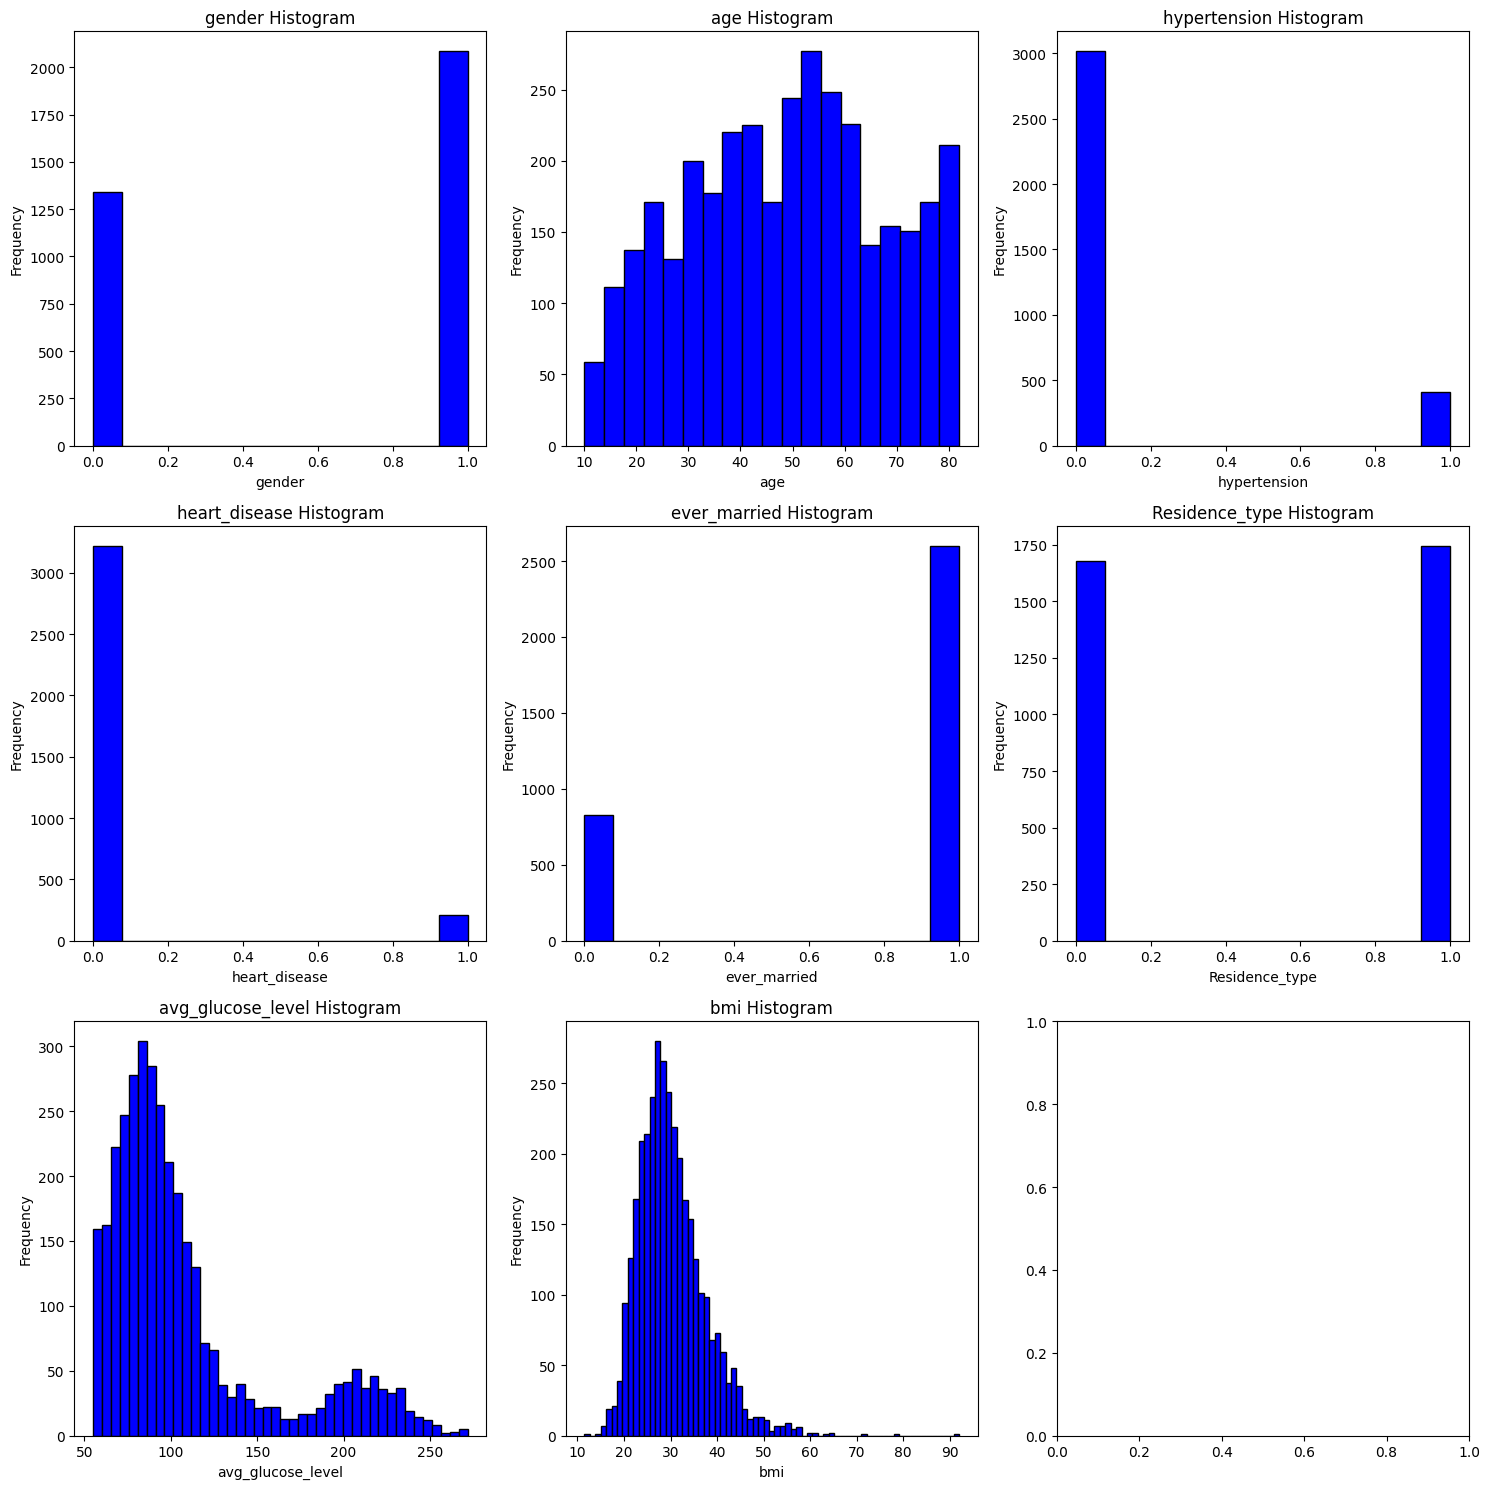

In [ ]:
# Creating histograms to check normal distribution of data
features_list = [
    'gender',
    'age',
    'hypertension',
    'heart_disease',
    'ever_married',
    'Residence_type',
    'avg_glucose_level',
    'bmi'
]

# Create the histogram layout
fig, axs = plt.subplots(3, 3, figsize=(15, 15))  # Adjusted for better visibility

# Iterate through features and axs
for i, feature in enumerate(features_list):
    # Determine the position of the subplot
    row = i // 3
    col = i % 3

    axs[row, col].hist(df_cleaned[feature], bins='auto', color='blue', edgecolor='black')
    axs[row, col].set_title(f'{feature} Histogram')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
corr = df_cleaned.corr()
corr

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
gender,1.00,-0.04,-0.04,-0.10,-0.02,0.01,-0.07,-0.01,-0.01,-0.01,0.00,0.00,0.01,-0.03,-0.07,0.09,-0.03
age,-0.04,1.00,0.27,0.26,0.52,0.02,0.23,0.08,0.24,0.05,-0.11,-0.18,0.30,-0.27,0.19,-0.13,-0.05
hypertension,-0.04,0.27,1.00,0.11,0.12,-0.00,0.17,0.13,0.14,0.01,-0.02,-0.06,0.09,-0.05,0.02,-0.01,-0.01
heart_disease,-0.10,0.26,0.11,1.00,0.08,0.01,0.14,0.00,0.14,-0.01,-0.02,-0.02,0.04,-0.04,0.06,-0.07,0.03
ever_married,-0.02,0.52,0.12,0.08,1.00,0.01,0.12,0.16,0.07,0.06,-0.11,-0.07,0.13,-0.25,0.11,-0.11,0.02
Residence_type,0.01,0.02,-0.00,0.01,0.01,1.00,-0.01,-0.01,0.01,0.01,0.04,-0.02,0.01,0.01,0.01,-0.03,0.04
avg_glucose_level,-0.07,0.23,0.17,0.14,0.12,-0.01,1.00,0.16,0.14,0.01,-0.01,-0.05,0.06,-0.02,0.05,-0.03,-0.02
bmi,-0.01,0.08,0.13,0.00,0.16,-0.01,0.16,1.00,0.01,0.02,-0.02,0.02,0.00,-0.14,0.04,-0.05,0.02
stroke,-0.01,0.24,0.14,0.14,0.07,0.01,0.14,0.01,1.00,-0.01,-0.02,-0.02,0.05,-0.03,0.04,-0.04,0.00
work_type_Govt_job,-0.01,0.05,0.01,-0.01,0.06,0.01,0.01,0.02,-0.01,1.00,-0.03,-0.56,-0.20,-0.06,0.00,-0.00,0.00


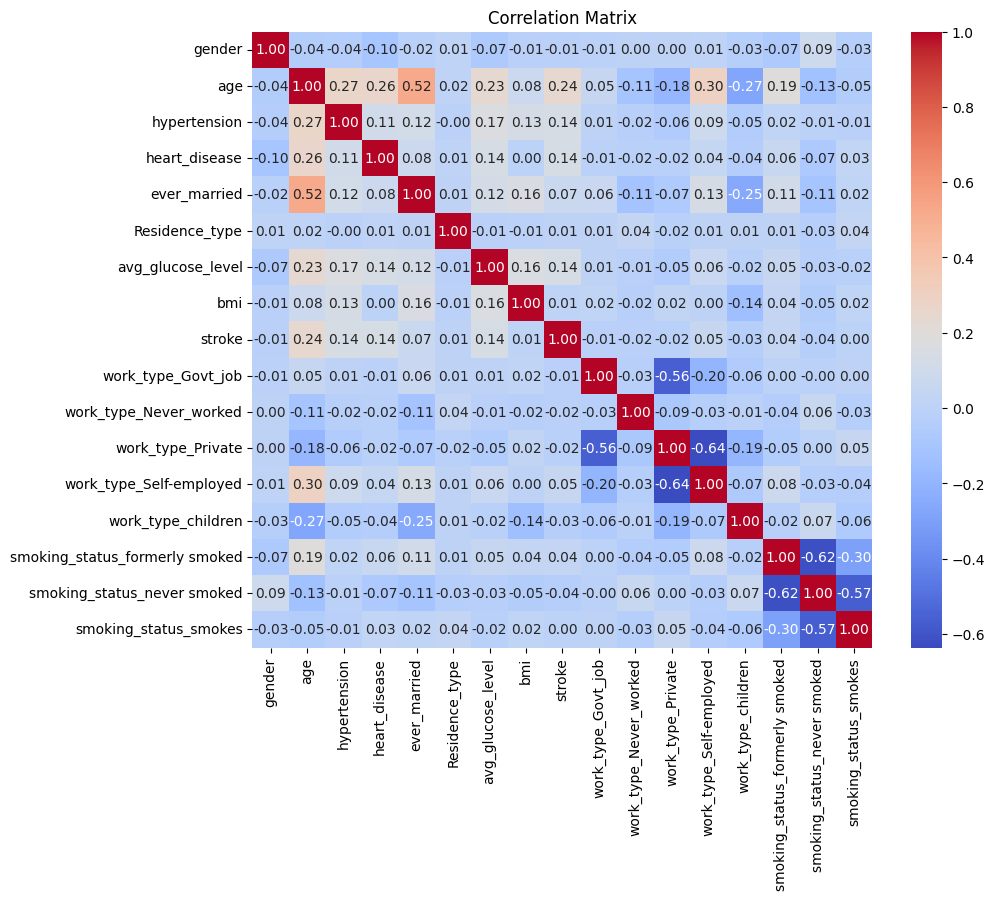

In [ ]:
# create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#preprocessing

In [ ]:
def scale_data(df, method="StandardScaler"):
  if method=="StandardScaler":
    scaler = StandardScaler()

  scale = scaler.fit(df)
  X_scaled = scaler.transform(df)

  return pd.DataFrame(X_scaled, columns=df.columns)

In [ ]:
def split_XY(df, target_col_name="stroke"):

  df_cleaned_split = df.copy()
  Y = df_cleaned_split.pop(target_col_name).values
  X = df_cleaned_split
  return X, Y

In [ ]:
def correlation_filter(df, treshold=0.03):
    # Compute correlation
    corr = df.corr()

    # Apply threshold
    valuable_cols = [col for col in corr.columns if abs(corr.loc[col, 'stroke']) > treshold]

    # Filter the DataFrame
    df_filtered = df[valuable_cols]

    # Split to features and targets
    X, y = split_XY(df_filtered, target_col_name='stroke')

    return X, y

In [ ]:
X, y = correlation_filter(df_cleaned)

In [ ]:
X_scaled = scale_data(df_cleaned)
X_scaled

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,-1.25,0.97,-0.37,3.95,0.56,0.98,2.52,0.86,4.25,-0.42,-0.06,0.75,-0.47,-0.14,1.76,-1.09,-0.52
1,-1.25,1.66,-0.37,3.95,0.56,-1.02,-0.05,0.30,4.25,-0.42,-0.06,0.75,-0.47,-0.14,-0.57,0.92,-0.52
2,0.80,0.02,-0.37,-0.25,0.56,0.98,1.32,0.56,4.25,-0.42,-0.06,0.75,-0.47,-0.14,-0.57,-1.09,1.91
3,0.80,1.61,2.72,-0.25,0.56,-1.02,1.38,-0.86,4.25,-0.42,-0.06,-1.34,2.11,-0.14,-0.57,0.92,-0.52
4,-1.25,1.72,-0.37,-0.25,0.56,0.98,1.63,-0.18,4.25,-0.42,-0.06,0.75,-0.47,-0.14,1.76,-1.09,-0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420,-1.25,1.77,2.72,-0.25,0.56,-1.02,-0.76,-0.27,-0.24,-0.42,-0.06,-1.34,2.11,-0.14,-0.57,0.92,-0.52
3421,0.80,0.44,-0.37,-0.25,0.56,-1.02,-0.64,-1.18,-0.24,-0.42,-0.06,0.75,-0.47,-0.14,-0.57,0.92,-0.52
3422,0.80,1.72,-0.37,-0.25,0.56,0.98,0.35,1.33,-0.24,-0.42,-0.06,-1.34,2.11,-0.14,-0.57,0.92,-0.52
3423,0.80,-0.72,-0.37,-0.25,0.56,-1.02,-0.53,0.04,-0.24,-0.42,-0.06,-1.34,2.11,-0.14,-0.57,0.92,-0.52


In [ ]:
def pca_features(df, treshold=80):
  # split to features and targets
  X, y = split_XY(df)

  # scale features
  X_scaled = scale_data(X)

  # perform PCA on feature data
  pca = PCA(n_components=X.shape[1])
  PC = pca.fit_transform(X_scaled)
  df_pca = pd.DataFrame(data=PC)

  # find how many features to satisfy treshold
  for i in range(1, X.shape[1]):
    exp_variance = sum(list(pca.explained_variance_ratio_*100)[:i])
    if exp_variance > treshold:
      break
  # return filtered scaled feature data
  return df_pca.iloc[:, :i], y, pca

In [ ]:
X, y, pca = pca_features(df_cleaned)

In [ ]:
pca.explained_variance_ratio_

array([1.49207868e-01, 1.10527683e-01, 9.67781721e-02, 8.15648038e-02,
       7.40810365e-02, 7.34940977e-02, 6.49232750e-02, 6.37311413e-02,
       6.04059566e-02, 5.65290939e-02, 5.22002736e-02, 4.87706634e-02,
       4.38678632e-02, 2.39180713e-02, 3.92440216e-32, 2.28298466e-33])

In [ ]:
# vybrat feature engineering
corr = True
if corr:
  X, y = correlation_filter(df_cleaned)
else:
  X, y, pca = pca_features(df_cleaned)

In [ ]:
X

,age,hypertension,heart_disease,ever_married,avg_glucose_level,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked
0,67.00,0,1,1,228.69,0,0,1,0
2,80.00,0,1,1,105.92,0,0,0,1
3,49.00,0,0,1,171.23,0,0,0,0
4,79.00,1,0,1,174.12,1,0,0,1
5,81.00,0,0,1,186.21,0,0,1,0
...,...,...,...,...,...,...,...,...,...
5100,82.00,1,0,1,71.97,1,0,0,1
5102,57.00,0,0,1,77.93,0,0,0,1
5106,81.00,0,0,1,125.20,1,0,0,1
5107,35.00,0,0,1,82.99,1,0,0,1


Preparations for training

In [ ]:
test_size = 0.2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=test_size, stratify=y)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2740, 9) (685, 9) (2740,) (685,)


#First models and their caomparission

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:04<00:00,  6.42it/s]

[LightGBM] [Info] Number of positive: 144, number of negative: 2596
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 350
[LightGBM] [Info] Number of data points in the train set: 2740, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.052555 -> initscore=-2.891914
[LightGBM] [Info] Start training from score -2.891914
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.78               0.72     0.72      0.84   
GaussianNB                         0.25               0.60     0.60      0.33   
DecisionTreeClassifier             0.92               0.58     0.58      0.92   
BaggingClassifier                  0.94               0.58     0.58      0.93   
ExtraTreeClassifier       

In [ ]:
def fine_tune_best_model(X_train, y_train, model_name="KNeighborsClassifier"):
  # define which hyperparameters to tune per algorithm
  hyperparameters = {
      "KNeighborsClassifier": {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric': ['minkowski', 'manhattan', 'euclidean']},
      "AdaBoostClassifier": {'n_estimators': [10, 50, 100], 'learning_rate': [0.5, 1, 1.5, 3], 'algorithm': ['SAMME', 'SAMME.R']},
      "NearestCentroid": {'metric': ['cityblock', 'cosine', 'haversine', 'euclidean', 'l1', 'l2', 'manhattan', 'nan_euclidean'  ], 'shrink_threshold': [0.1, 1, 5, 10, 100]},
      "QuadraticDiscriminantAnalysis": {'tol': [1.0e-3, 1.0e-4, 1.0e-5], 'reg_param': [0, 1, 2]},
  }

  # chech whether we have model in the "database" and init instance
  if model_name=="KNeighborsClassifier":
    model = KNeighborsClassifier()
  elif model_name=="AdaBoostClassifier":
    model = AdaBoostClassifier()
  elif model_name=="NearestCentroid":
    model = NearestCentroid()
  elif model_name=="QuadraticDiscriminantAnalysis":
    model = QuadraticDiscriminantAnalysis()
  else:
    print("zatím neznám")
    return None

  # create gridseach with defined hyperparameters
  print("Počítám....")

  gs = GridSearchCV(model, hyperparameters[model_name], scoring='balanced_accuracy', verbose=3, cv=5)
  gs.fit(X_train, y_train)

  print(f"For {model_name} best parameters: {gs.best_params_}")

  # return best model
  return gs.best_estimator_

In [ ]:
best_parameters = fine_tune_best_model(X_train, y_train, "NearestCentroid")

Počítám....
Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END metric=cityblock, shrink_threshold=0.1;, score=0.616 total time=   0.0s
[CV 2/5] END metric=cityblock, shrink_threshold=0.1;, score=0.632 total time=   0.0s
[CV 3/5] END metric=cityblock, shrink_threshold=0.1;, score=0.687 total time=   0.0s
[CV 4/5] END metric=cityblock, shrink_threshold=0.1;, score=0.646 total time=   0.0s
[CV 5/5] END metric=cityblock, shrink_threshold=0.1;, score=0.625 total time=   0.0s
[CV 1/5] END metric=cityblock, shrink_threshold=1;, score=0.633 total time=   0.0s
[CV 2/5] END metric=cityblock, shrink_threshold=1;, score=0.630 total time=   0.0s
[CV 3/5] END metric=cityblock, shrink_threshold=1;, score=0.681 total time=   0.0s
[CV 4/5] END metric=cityblock, shrink_threshold=1;, score=0.642 total time=   0.0s
[CV 5/5] END metric=cityblock, shrink_threshold=1;, score=0.619 total time=   0.0s
[CV 1/5] END metric=cityblock, shrink_threshold=5;, score=0.706 total time=   0.0s
[CV

In [ ]:
model = NearestCentroid(metric='manhattan',shrink_threshold=1)
model.fit(X_train, y_train)

NearestCentroid(metric='manhattan', shrink_threshold=1)

In [ ]:
def evaluate_model(X_test, y_test, model):
  metrics = {"accuracy": 0,
             'balanced_accuracy': 0,
             "precision": 0,
             "recall": 0,
             "f1": 0}

  y_pred = model.predict(X_test)

  metrics["accuracy"] = accuracy_score(y_test, y_pred)
  metrics["precision"] = precision_score(y_test, y_pred)
  metrics["recall"] = recall_score(y_test, y_pred)
  metrics["f1"] = f1_score(y_test, y_pred)
  metrics['balanced_accuracy'] = balanced_accuracy_score(y_test, y_pred)

  cm = confusion_matrix(y_test, y_pred)

  return metrics, cm

In [ ]:
evaluate_model(X_test, y_test, model)

({'accuracy': 0.7182481751824817,
  'balanced_accuracy': 0.746361924328026,
  'precision': 0.13145539906103287,
  'recall': 0.7777777777777778,
  'f1': 0.22489959839357432},
 array([[464, 185],
        [  8,  28]]))

In [ ]:
def plot_metrics(models):
  # here store metrics to given models
  metric_comparison = dict()
  # iterate over models, find best, apply on test and calculate metrics
  for model in models:
    final = fine_tune_best_model(X_train, y_train, model_name=model)
    metrics, cm = evaluate_model(X_test, y_test, final)
    metric_comparison[model] = metrics

  # transform dict with metrics into dataframe for easy plotting
  df = pd.DataFrame.from_dict(
    metric_comparison,
    orient='index',
    columns=list(metrics.keys())
  )

  melted = pd.melt(df.reset_index(), id_vars='index', var_name='metric')
  # rename index to algorithm
  melted = melted.rename(columns={"index": "algorithm"})
  # plot comparison
  sns.barplot(x='metric', y='value', hue='algorithm', data=melted)
  plt.show()

Počítám....
Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END metric=cityblock, shrink_threshold=0.1;, score=0.616 total time=   0.0s
[CV 2/5] END metric=cityblock, shrink_threshold=0.1;, score=0.632 total time=   0.0s
[CV 3/5] END metric=cityblock, shrink_threshold=0.1;, score=0.687 total time=   0.0s
[CV 4/5] END metric=cityblock, shrink_threshold=0.1;, score=0.646 total time=   0.0s
[CV 5/5] END metric=cityblock, shrink_threshold=0.1;, score=0.625 total time=   0.0s
[CV 1/5] END metric=cityblock, shrink_threshold=1;, score=0.633 total time=   0.0s
[CV 2/5] END metric=cityblock, shrink_threshold=1;, score=0.630 total time=   0.0s
[CV 3/5] END metric=cityblock, shrink_threshold=1;, score=0.681 total time=   0.0s
[CV 4/5] END metric=cityblock, shrink_threshold=1;, score=0.642 total time=   0.0s
[CV 5/5] END metric=cityblock, shrink_threshold=1;, score=0.619 total time=   0.0s
[CV 1/5] END metric=cityblock, shrink_threshold=5;, score=0.706 total time=   0.0s
[CV

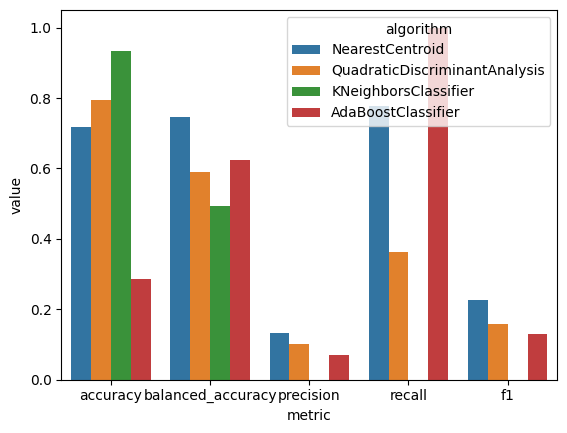

In [ ]:
plot_metrics(models=['NearestCentroid', 'QuadraticDiscriminantAnalysis',"KNeighborsClassifier", "AdaBoostClassifier"])